### Our Datasets
for the csv dataset we are using a dataset from machine learning about avocado sales
Q1: Are avocado sales different for different regions?
Q2: Does average avocado price affect total volume sold?

for the api dataset we are using a dataset from a weather API
Q1: Are Madison and Chicago following similar temperature trends?
Q2: Does Sun/Cloud affect Max/Min Temps

In [96]:
import requests
import json
import pandas as pd # data analysis and manipulation
import numpy as np #numerical and scientific computing
from sklearn import datasets # free inbuilt datasets
import plotly.express as px #graphing and statistical tools
import matplotlib.pyplot as plt

In [69]:
csvData = pd.read_csv('avocado-updated-2020.csv')
APIurl1 = 'https://weatherdbi.herokuapp.com/data/weather/{wisconsin}'
APIurl2 = 'https://weatherdbi.herokuapp.com/data/weather/{illinois}'
r1 = requests.get(APIurl1)
print(r1.text)
r2 = requests.get(APIurl2)
print(r2.text)

{"region":"Madison, WI","currentConditions":{"dayhour":"Thursday 7:00 PM","temp":{"c":-8,"f":18},"precip":"98%","humidity":"86%","wind":{"km":13,"mile":8},"iconURL":"https://ssl.gstatic.com/onebox/weather/64/snow.png","comment":"Snow"},"next_days":[{"day":"Thursday","comment":"Snow","max_temp":{"c":-6,"f":22},"min_temp":{"c":-10,"f":14},"iconURL":"https://ssl.gstatic.com/onebox/weather/48/snow.png"},{"day":"Friday","comment":"Cloudy","max_temp":{"c":-3,"f":26},"min_temp":{"c":-13,"f":9},"iconURL":"https://ssl.gstatic.com/onebox/weather/48/cloudy.png"},{"day":"Saturday","comment":"Sunny","max_temp":{"c":2,"f":36},"min_temp":{"c":-6,"f":22},"iconURL":"https://ssl.gstatic.com/onebox/weather/48/sunny.png"},{"day":"Sunday","comment":"Partly cloudy","max_temp":{"c":1,"f":34},"min_temp":{"c":-9,"f":16},"iconURL":"https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png"},{"day":"Monday","comment":"Partly cloudy","max_temp":{"c":6,"f":43},"min_temp":{"c":-4,"f":24},"iconURL":"https://ssl.gs

In [70]:
csvData.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [83]:
rdata1 = json.loads(r1.text)
new_columns = ['Day', 'Conditions', 'High Temp','Low Temp']
df1 = pd.DataFrame(columns=new_columns)
print(rdata1['next_days'])
for x in rdata1['next_days']:
    df1.loc[len(df1)] = [x['day'],  x['comment'],x['max_temp'],x['min_temp']]

    ## Adding Columns
df1['City'] = 'Madison'    
display(df1)


[{'day': 'Thursday', 'comment': 'Snow', 'max_temp': {'c': -6, 'f': 22}, 'min_temp': {'c': -10, 'f': 14}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/snow.png'}, {'day': 'Friday', 'comment': 'Cloudy', 'max_temp': {'c': -3, 'f': 26}, 'min_temp': {'c': -13, 'f': 9}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/cloudy.png'}, {'day': 'Saturday', 'comment': 'Sunny', 'max_temp': {'c': 2, 'f': 36}, 'min_temp': {'c': -6, 'f': 22}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/sunny.png'}, {'day': 'Sunday', 'comment': 'Partly cloudy', 'max_temp': {'c': 1, 'f': 34}, 'min_temp': {'c': -9, 'f': 16}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png'}, {'day': 'Monday', 'comment': 'Partly cloudy', 'max_temp': {'c': 6, 'f': 43}, 'min_temp': {'c': -4, 'f': 24}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png'}, {'day': 'Tuesday', 'comment': 'Partly cloudy', 'max_temp': {'c': 4, 'f': 40}, 'min_temp': {'c': -3, 'f': 26}, 'iconURL':

,Day,Conditions,High Temp,Low Temp,City
0,Thursday,Snow,"{'c': -6, 'f': 22}","{'c': -10, 'f': 14}",Madison
1,Friday,Cloudy,"{'c': -3, 'f': 26}","{'c': -13, 'f': 9}",Madison
2,Saturday,Sunny,"{'c': 2, 'f': 36}","{'c': -6, 'f': 22}",Madison
3,Sunday,Partly cloudy,"{'c': 1, 'f': 34}","{'c': -9, 'f': 16}",Madison
4,Monday,Partly cloudy,"{'c': 6, 'f': 43}","{'c': -4, 'f': 24}",Madison
5,Tuesday,Partly cloudy,"{'c': 4, 'f': 40}","{'c': -3, 'f': 26}",Madison
6,Wednesday,Partly cloudy,"{'c': 2, 'f': 35}","{'c': -7, 'f': 20}",Madison
7,Thursday,Mostly cloudy,"{'c': 2, 'f': 36}","{'c': -3, 'f': 27}",Madison


In [84]:
rdata2 = json.loads(r2.text)
new_columns = ['Day', 'Conditions', 'High Temp','Low Temp']
df2 = pd.DataFrame(columns=new_columns)
print(rdata2['next_days'])
for x in rdata2['next_days']:
    df2.loc[len(df2)] = [x['day'],  x['comment'],x['max_temp'],x['min_temp']]
    ## Adding Columns
df2["City"] = "Chicago"
display(df2)

[{'day': 'Thursday', 'comment': 'Snow', 'max_temp': {'c': -2, 'f': 29}, 'min_temp': {'c': -4, 'f': 25}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/snow.png'}, {'day': 'Friday', 'comment': 'Cloudy', 'max_temp': {'c': -2, 'f': 28}, 'min_temp': {'c': -8, 'f': 18}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/cloudy.png'}, {'day': 'Saturday', 'comment': 'Sunny', 'max_temp': {'c': 2, 'f': 36}, 'min_temp': {'c': -3, 'f': 27}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/sunny.png'}, {'day': 'Sunday', 'comment': 'Partly cloudy', 'max_temp': {'c': 2, 'f': 35}, 'min_temp': {'c': -4, 'f': 24}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png'}, {'day': 'Monday', 'comment': 'Partly cloudy', 'max_temp': {'c': 6, 'f': 42}, 'min_temp': {'c': -1, 'f': 30}, 'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png'}, {'day': 'Tuesday', 'comment': 'Partly cloudy', 'max_temp': {'c': 3, 'f': 38}, 'min_temp': {'c': -1, 'f': 30}, 'iconURL': 

,Day,Conditions,High Temp,Low Temp,City
0,Thursday,Snow,"{'c': -2, 'f': 29}","{'c': -4, 'f': 25}",Chicago
1,Friday,Cloudy,"{'c': -2, 'f': 28}","{'c': -8, 'f': 18}",Chicago
2,Saturday,Sunny,"{'c': 2, 'f': 36}","{'c': -3, 'f': 27}",Chicago
3,Sunday,Partly cloudy,"{'c': 2, 'f': 35}","{'c': -4, 'f': 24}",Chicago
4,Monday,Partly cloudy,"{'c': 6, 'f': 42}","{'c': -1, 'f': 30}",Chicago
5,Tuesday,Partly cloudy,"{'c': 3, 'f': 38}","{'c': -1, 'f': 30}",Chicago
6,Wednesday,Partly cloudy,"{'c': 4, 'f': 40}","{'c': -3, 'f': 26}",Chicago
7,Thursday,Mostly cloudy,"{'c': 2, 'f': 35}","{'c': 0, 'f': 32}",Chicago


In [73]:
## Dropping Columns
csvData.drop(['4046', '4225', '4770'], axis = 1, inplace=True)


In [74]:
csvData.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [75]:
#plot
fig = px.box(csvData, x='average_price')

fig.show()

## Smoothing Data Removing Outliers
Q1 = np.percentile(csvData['average_price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(csvData['average_price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

#set max and lower values
upper = np.where(csvData['average_price'] >= (Q3+1.5*IQR))
lower = np.where(csvData['average_price'] <= (Q1-1.5*IQR))

#drop anything above upper and lower values
csvData.drop(upper[0], inplace = True)
csvData.drop(lower[0], inplace = True)

#plot new box plot
fig = px.box(csvData, x='average_price')

fig.show()

In [85]:
mergedDf = pd.concat([df1,df2])
mergedDf.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
display(mergedDf)


,Day,Conditions,High Temp,Low Temp,City
0,Thursday,Snow,"{'c': -6, 'f': 22}","{'c': -10, 'f': 14}",Madison
1,Friday,Cloudy,"{'c': -3, 'f': 26}","{'c': -13, 'f': 9}",Madison
2,Saturday,Sunny,"{'c': 2, 'f': 36}","{'c': -6, 'f': 22}",Madison
3,Sunday,Partly cloudy,"{'c': 1, 'f': 34}","{'c': -9, 'f': 16}",Madison
4,Monday,Partly cloudy,"{'c': 6, 'f': 43}","{'c': -4, 'f': 24}",Madison
5,Tuesday,Partly cloudy,"{'c': 4, 'f': 40}","{'c': -3, 'f': 26}",Madison
6,Wednesday,Partly cloudy,"{'c': 2, 'f': 35}","{'c': -7, 'f': 20}",Madison
7,Thursday,Mostly cloudy,"{'c': 2, 'f': 36}","{'c': -3, 'f': 27}",Madison
0,Thursday,Snow,"{'c': -2, 'f': 29}","{'c': -4, 'f': 25}",Chicago
1,Friday,Cloudy,"{'c': -2, 'f': 28}","{'c': -8, 'f': 18}",Chicago


In [92]:
## Dropping unwanted Data, looking at geographic sales info
cities = list(csvData.geography.unique())
print(cities)
cities.pop(29)
cities.pop(29)
cities.pop(44)
cities.pop(48)
cities.pop(48)

print(cities)

['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast', 'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'South Carolina', 'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico']
['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detr

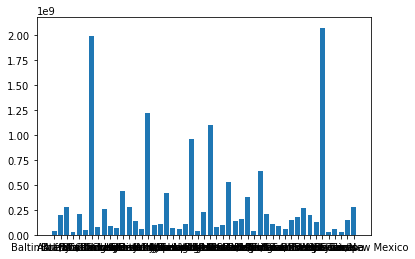

In [97]:
regionSum = []
for eachRegion in cities:
    currentData= csvData[csvData.geography == eachRegion]
    tempSum = sum(currentData['total_volume'])
    regionSum.append(tempSum)
        
plt.bar(cities, regionSum)
plt.show()